In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

import os 
import numpy as np

First open all series (SC, LC and WN) and plot their autocorrelation

In [8]:
ISIseq_path = "/Users/nicolasfarrugia/Dropbox/Manip/Individual_ISI_series/series_manip_512stim/series txt/"

In [9]:
allfiles = os.listdir(ISIseq_path)

In [17]:
# To make sure the files are taken for the right train
allfiles = sorted(allfiles)

In [18]:
SC_files=allfiles[0:75:3]
print("All SC files : ")
print(SC_files)

print("All LC files : ")
LC_files=allfiles[1:75:3]
print(LC_files)

print("All WN files : ")
WN_files=allfiles[2:75:3]
print(WN_files)

All SC files : 
['10_AR1_Series(n512,M2000,CV26).txt', '11_AR1_Series(n512,M2000,CV26).txt', '12_AR1_Series(n512,M2000,CV26).txt', '13_AR1_Series(n512,M2000,CV26).txt', '14_AR1_Series(n512,M2000,CV26).txt', '15_AR1_Series(n512,M2000,CV26).txt', '16_AR1_Series(n512,M2000,CV26).txt', '17_AR1_Series(n512,M2000,CV26).txt', '18_AR1_Series(n512,M2000,CV26).txt', '19_AR1_Series(n512,M2000,CV26).txt', '1_AR1_Series(n512,M2000,CV26).txt', '20_AR1_Series(n512,M2000,CV26).txt', '21_AR1_Series(n512,M2000,CV26).txt', '22_AR1_Series(n512,M2000,CV26).txt', '23_AR1_Series(n512,M2000,CV26).txt', '24_AR1_Series(n512,M2000,CV26).txt', '25_AR1_Series(n512,M2000,CV26).txt', '2_AR1_Series(n512,M2000,CV26).txt', '3_AR1_Series(n512,M2000,CV26).txt', '4_AR1_Series(n512,M2000,CV26).txt', '5_AR1_Series(n512,M2000,CV26).txt', '6_AR1_Series(n512,M2000,CV26).txt', '7_AR1_Series(n512,M2000,CV26).txt', '8_AR1_Series(n512,M2000,CV26).txt', '9_AR1_Series(n512,M2000,CV26).txt']
All LC files : 
['10_OneOverF_Series(n512,

In [19]:
SC_series = [np.recfromtxt(os.path.join(ISIseq_path,X)) for X in SC_files]
LC_series = [np.recfromtxt(os.path.join(ISIseq_path,X)) for X in LC_files]
WN_series = [np.recfromtxt(os.path.join(ISIseq_path,X)) for X in WN_files]


Plot just a few subjects 

/home/gyldhas/Nico/jup/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
/home/gyldhas/Nico/jup/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
/home/gyldhas/Nico/jup/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


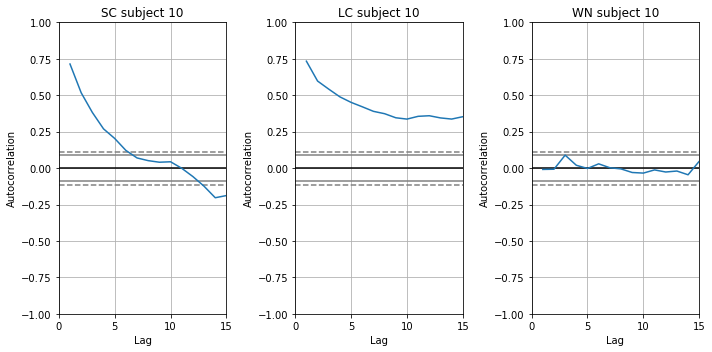

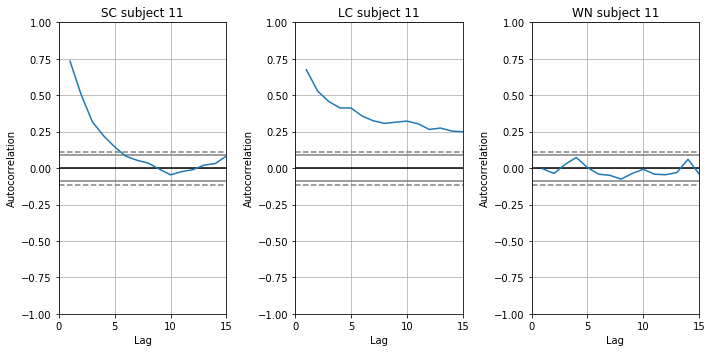

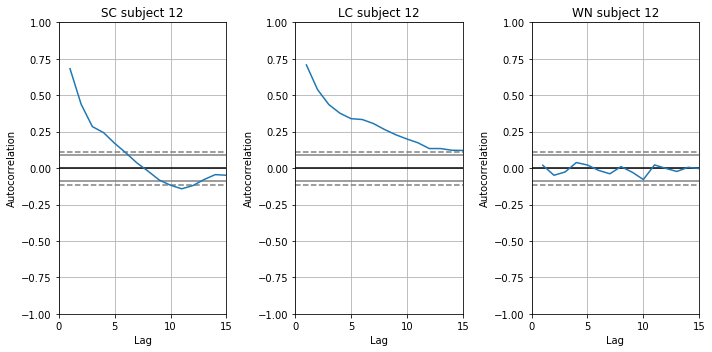

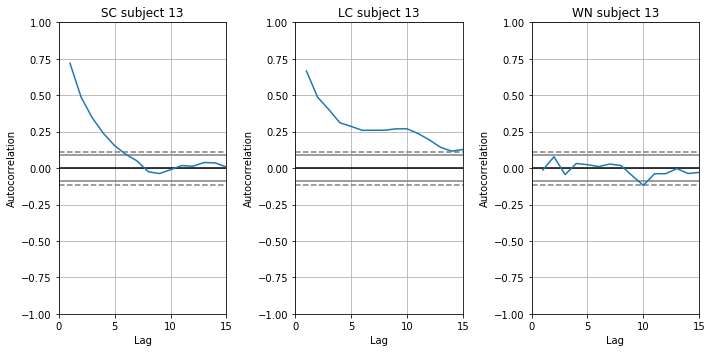

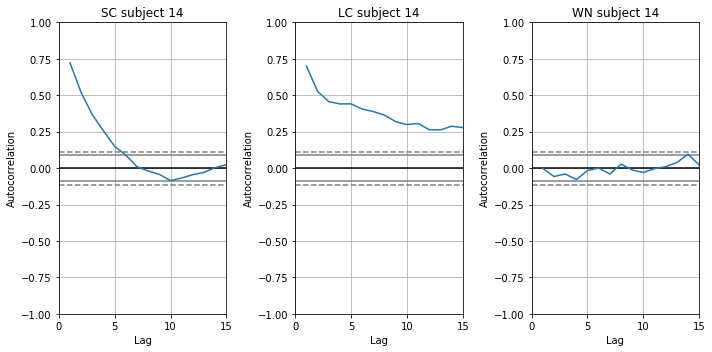

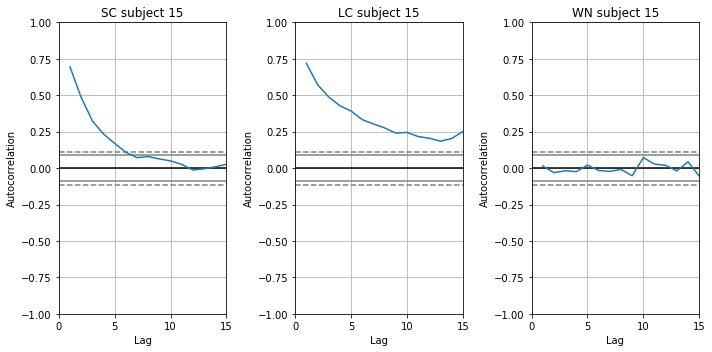

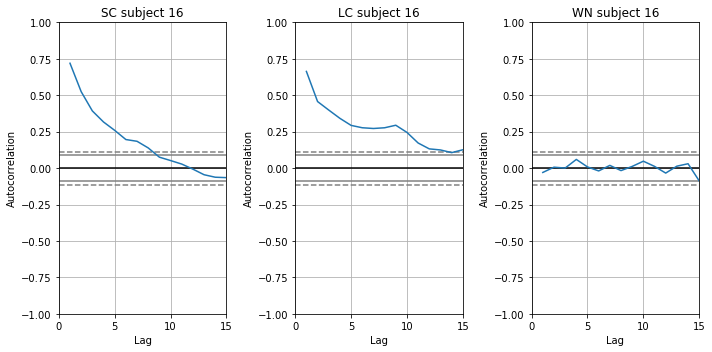

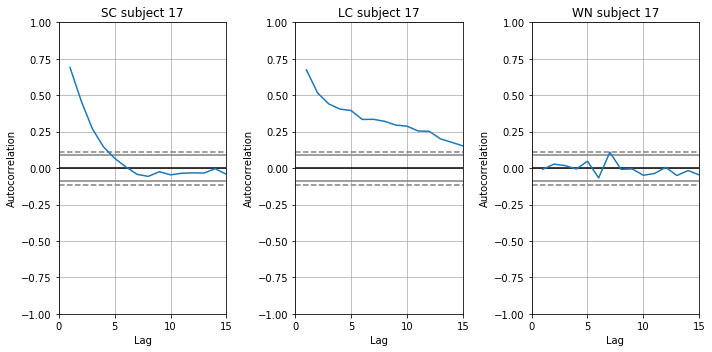

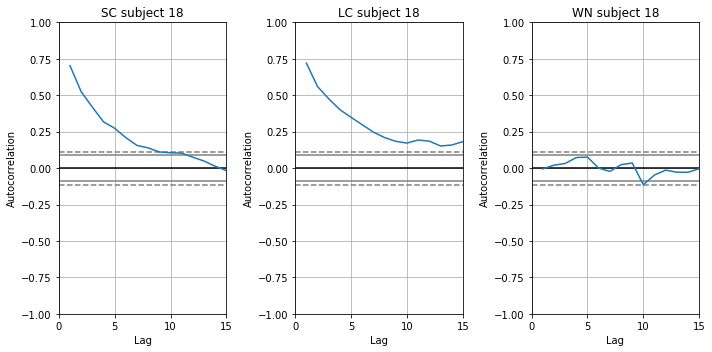

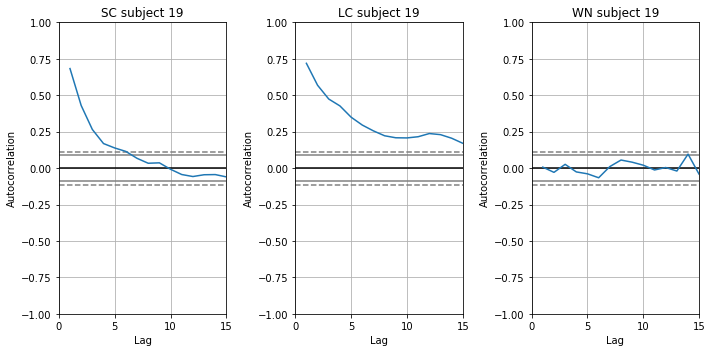

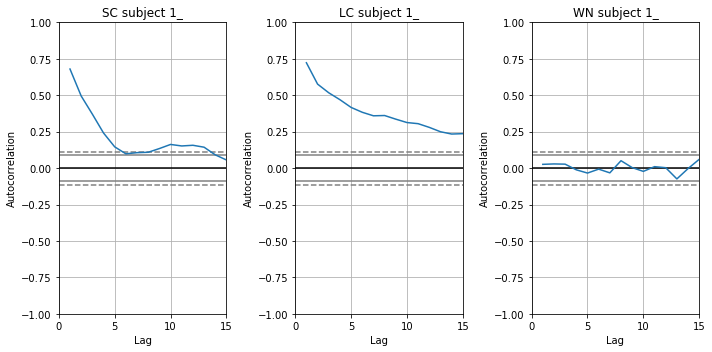

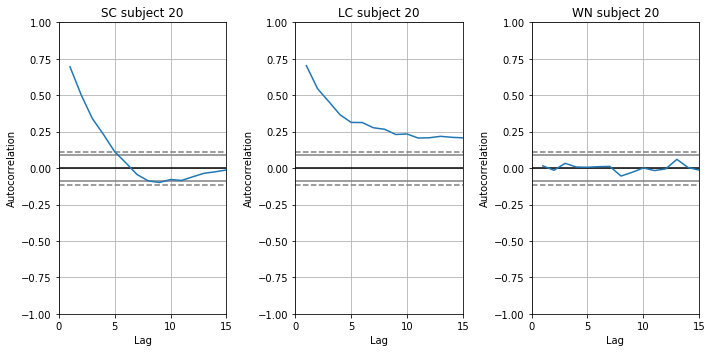

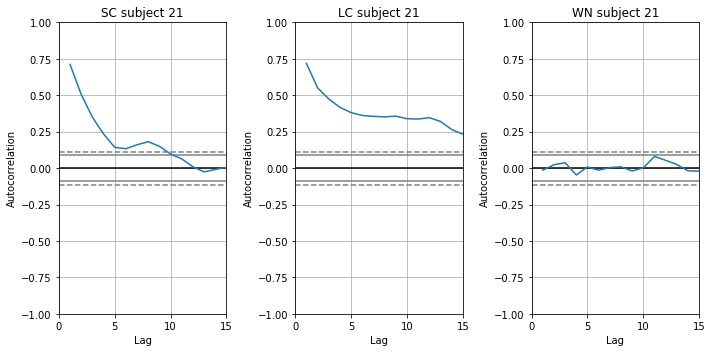

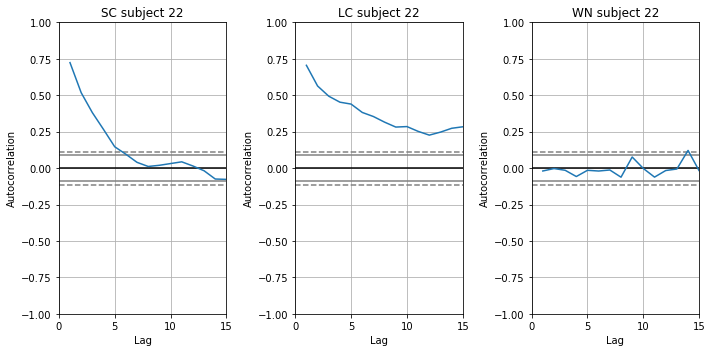

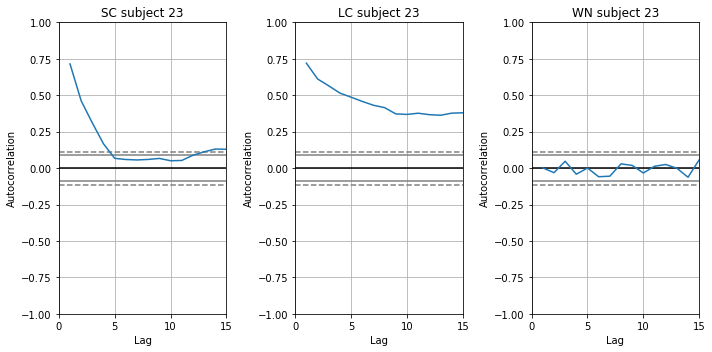

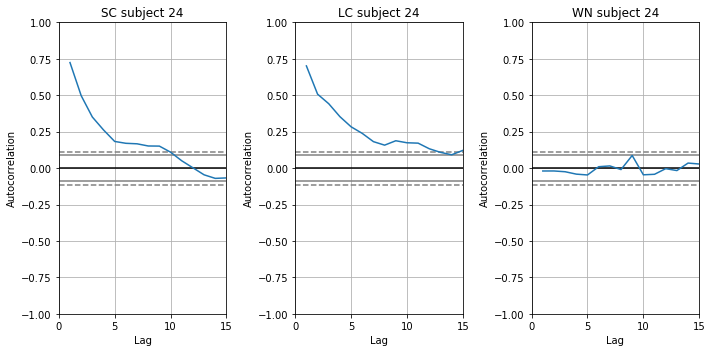

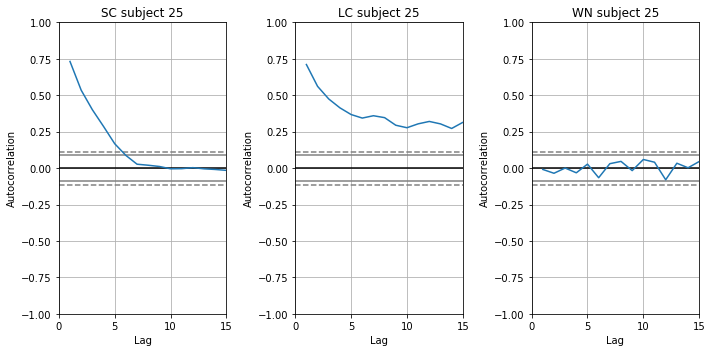

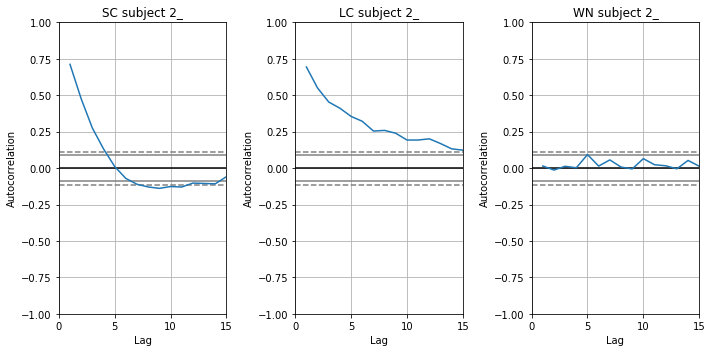

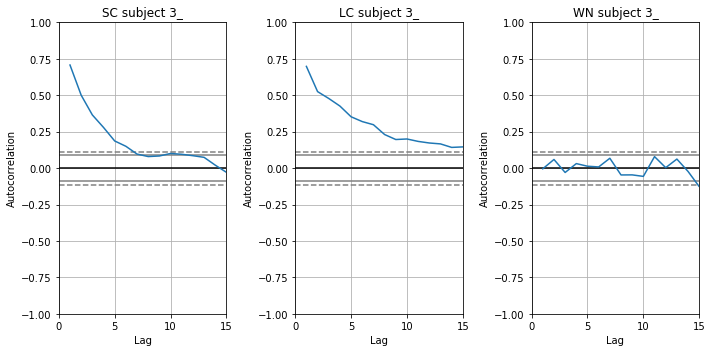

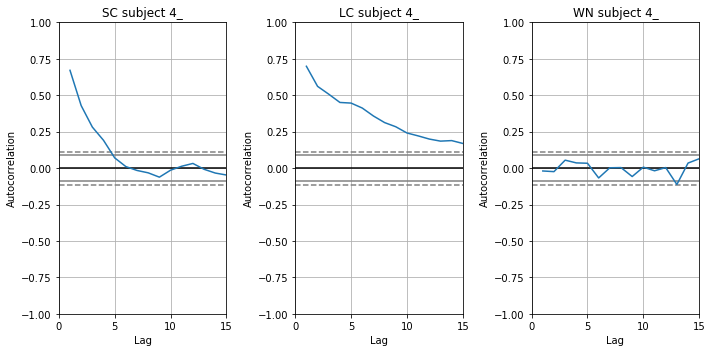

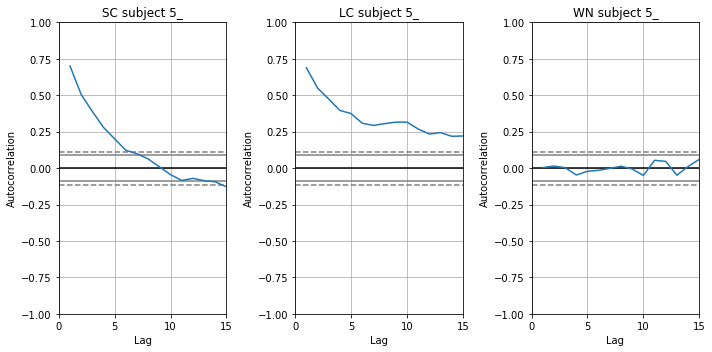

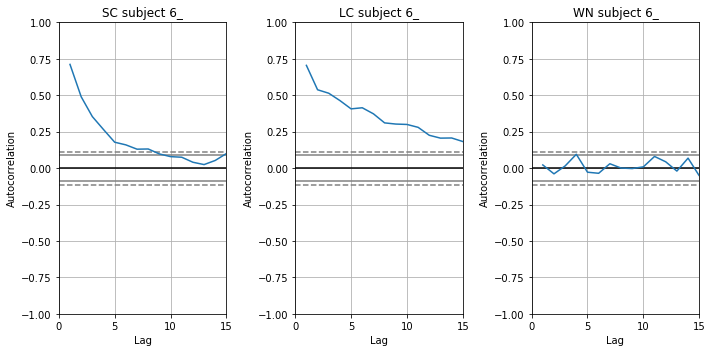

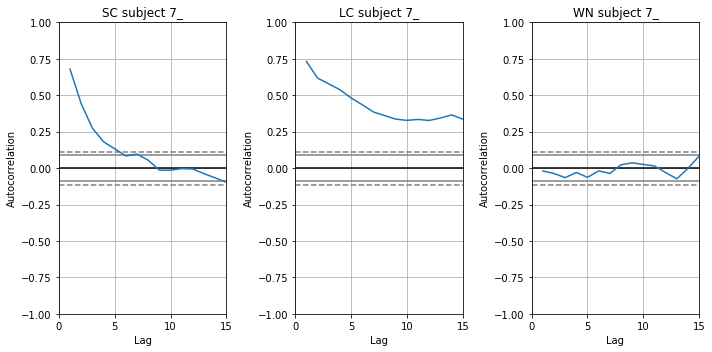

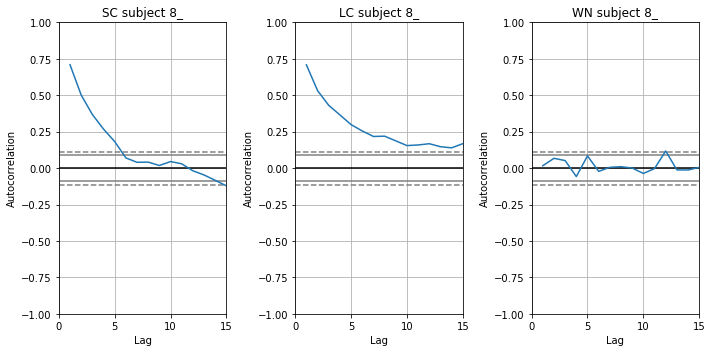

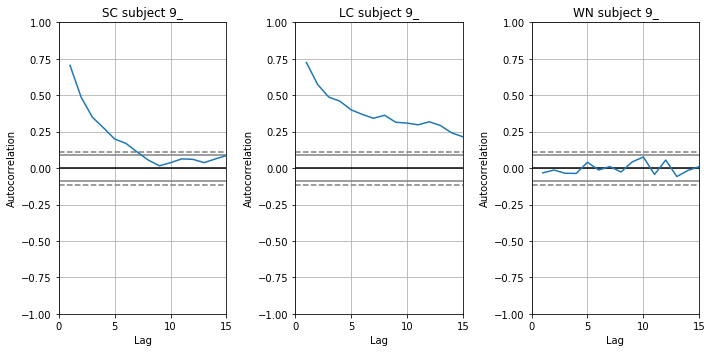

In [20]:
from pandas.tools.plotting import autocorrelation_plot

nbsubjtoplot = 25

for cur_sc,cur_lc,cur_wn,subjnum in zip(SC_series[0:nbsubjtoplot],
                                        LC_series[0:nbsubjtoplot],
                                        WN_series[0:nbsubjtoplot],
                                        SC_files[0:nbsubjtoplot]):
    
    subjid = subjnum[0:2]
    plt.figure(figsize=(10,5))
    
    ax1=plt.subplot(1,3,1)
    autocorrelation_plot(cur_sc,ax1)
    plt.xlim([0,15])
    plt.ylim([-1,1])
    plt.title("SC subject %s" % subjid)
    
    ax2=plt.subplot(1,3,2)
    autocorrelation_plot(cur_lc,ax2)
    plt.xlim([0,15])
    plt.ylim([-1,1])
    plt.title("LC subject %s" % subjid)
    
    ax3=plt.subplot(1,3,3)
    autocorrelation_plot(cur_wn,ax3)
    plt.xlim([0,15])
    plt.ylim([-1,1])
    plt.title("WN subject %s" % subjid)
    
    plt.tight_layout()
    plt.show()

Neural Networks using [KERAS](www.keras.io)


In [106]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 1
timesteps = 511

hidden_dim = 32

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(hidden_dim, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(hidden_dim, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(hidden_dim, return_sequences=True)) 
model.add(LSTM(1,return_sequences=True))  # return a single vector of dimension 32
# model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 511, 32)           4352      
_________________________________________________________________
lstm_42 (LSTM)               (None, 511, 32)           8320      
_________________________________________________________________
lstm_43 (LSTM)               (None, 511, 32)           8320      
_________________________________________________________________
lstm_44 (LSTM)               (None, 511, 1)            136       
Total params: 21,128
Trainable params: 21,128
Non-trainable params: 0
_________________________________________________________________


In [107]:
def norm(v):
    return((v-min(v))/(max(v)-min(v)))

def norm_batch(b):
    return np.array([norm(v) for v in b])

In [108]:
X_train = np.vstack(SC_series)
Y_train = norm_batch(X_train[:22,1:])

Y_val = norm_batch(X_train[22:,1:])
X_val = norm_batch(X_train[22:,:511])

X_train = norm_batch(X_train[:22,:511])

print(X_train[0][:10])

print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape)

[ 0.50655172  0.3662069   0.34275862  0.32482759  0.36586207  0.40241379
  0.42517241  0.27551724  0.42689655  0.42724138]
(22, 511) (22, 511) (3, 511) (3, 511)


In [ ]:
model.fit(X_train.reshape((22,511,1)), Y_train.reshape((22,511,1)),
          batch_size=8, epochs=50)

Epoch 1/50
22/22 [==============================] - 3s - loss: 0.2448 - acc: 0.0020     
Epoch 2/50
22/22 [==============================] - 2s - loss: 0.1015 - acc: 0.0020     
Epoch 3/50
22/22 [==============================] - 2s - loss: 0.0395 - acc: 0.0020     
Epoch 4/50
22/22 [==============================] - 2s - loss: 0.0347 - acc: 0.0018     
Epoch 5/50
22/22 [==============================] - 2s - loss: 0.0346 - acc: 0.0020     
Epoch 6/50
22/22 [==============================] - 2s - loss: 0.0345 - acc: 0.0018     
Epoch 7/50
22/22 [==============================] - 2s - loss: 0.0344 - acc: 0.0018     
Epoch 8/50
22/22 [==============================] - 2s - loss: 0.0351 - acc: 0.0019     
Epoch 9/50
22/22 [==============================] - 2s - loss: 0.0346 - acc: 0.0020     
Epoch 10/50
22/22 [==============================] - 2s - loss: 0.0349 - acc: 0.0021     
Epoch 11/50
22/22 [==============================] - 2s - loss: 0.0348 - acc: 0.0022     
Epoch 12/50
22/22 [

In [103]:
test = model.evaluate(X_val.reshape(3,511,1), Y_val.reshape(3, 511, 1))
print("Accuracy: ", test[1])

3/3 [==============================] - 0s
Accuracy:  0.00391389429569


New model using sequence-to-sequence autoencoders 

In [287]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
from keras import regularizers

timesteps = 512
input_dim = 1 
latent_dim = 50

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim,kernel_regularizer=regularizers.l2(0.01),
              activity_regularizer=regularizers.l1(0.01))(inputs)


decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)

#Create the encoder model 
encoder = Model(inputs, encoded)

# create the decoder model
#decoder = Model(encoded, decoded)



In [292]:
sequence_autoencoder.compile(loss='cosine_proximity',
              optimizer='RMSprop',lr = 0.01)

In [293]:
X_train = (np.vstack(SC_series[0:20]).reshape((20,512,1)))

X_test = (np.vstack(SC_series[20:]).reshape((5,512,1)))

print(X_train.shape,X_test.shape)

sequence_autoencoder.fit(X_train,X_train,epochs=10,validation_data=(X_test,X_test))


(20, 512, 1) (5, 512, 1)


/Users/nicolasfarrugia/miniconda3/envs/tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 20 samples, validate on 5 samples
Epoch 1/10
20/20 [==============================] - 11s - loss: 1.6754 - val_loss: -0.3230
Epoch 2/10
20/20 [==============================] - 4s - loss: 1.6716 - val_loss: -0.3238
Epoch 3/10
20/20 [==============================] - 4s - loss: 1.6723 - val_loss: -0.3244
Epoch 4/10
20/20 [==============================] - 4s - loss: 1.6702 - val_loss: -0.3249
Epoch 5/10
20/20 [==============================] - 4s - loss: 1.6705 - val_loss: -0.3254
Epoch 6/10
20/20 [==============================] - 4s - loss: 1.6688 - val_loss: -0.3139
Epoch 7/10
20/20 [==============================] - 4s - loss: 1.7169 - val_loss: -0.3336
Epoch 8/10
20/20 [==============================] - 4s - loss: 1.6347 - val_loss: -0.3266
Epoch 9/10
20/20 [==============================] - 4s - loss: 1.6676 - val_loss: -0.3389
Epoch 10/10
20/20 [==============================] - 4s - loss: 1.6184 - val_loss: -0.3684


In [290]:
# encode and decode some digits
# note that we take them from the *test* set
#encoded_seqs = encoder.predict(X_test)
decoded_seqs = sequence_autoencoder.predict(X_test)

/Users/nicolasfarrugia/miniconda3/envs/tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


(0, 15)

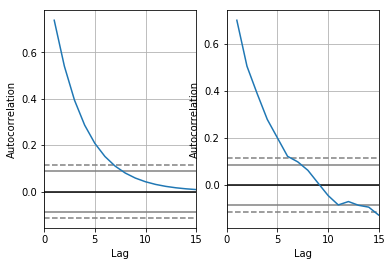

In [291]:
plt.figure()
ax1=plt.subplot(1,2,1)
autocorrelation_plot(decoded_seqs[0],ax1)
plt.xlim([0,15])
ax2 = plt.subplot(1,2,2)
autocorrelation_plot(X_test[0],ax2)
plt.xlim([0,15])

(0, 15)

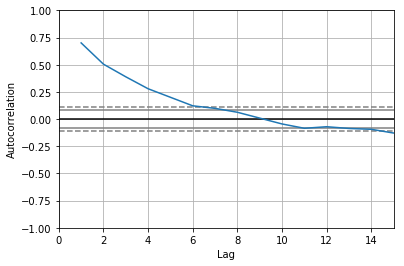

In [235]:
X_test[0]

array([[-0.66741005],
       [-0.43921877],
       [-0.90730994],
       [-0.80893679],
       [ 0.13006158],
       [ 0.63828184],
       [ 0.55482159],
       [-0.81136842],
       [-0.52153117],
       [-1.25640047],
       [-0.25187521],
       [ 0.35693023],
       [ 0.78380901],
       [-0.09214108],
       [-1.73471119],
       [-1.40396993],
       [-1.62817942],
       [-0.769998  ],
       [-0.4703539 ],
       [ 0.14462517],
       [ 0.64069667],
       [ 0.12620588],
       [ 0.13747878],
       [-1.87838538],
       [-1.37613466],
       [-0.99280197],
       [-0.95858407],
       [-0.71070749],
       [-1.18760686],
       [-1.12066406],
       [-1.12355882],
       [-1.18650088],
       [-0.97815919],
       [-0.99463472],
       [-0.31096245],
       [ 1.21479996],
       [ 0.84423577],
       [ 0.72206734],
       [ 0.42553982],
       [ 0.82932049],
       [-0.28247851],
       [ 0.90482747],
       [ 0.64979179],
       [ 0.96324474],
       [ 1.60730319],
       [ 1